#**IMPORT LIBRARIES**

In [1]:
import tensorflow as tf
print(tf.__version__)


2.10.0


In [54]:
pip uninstall tensorflow

Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.17.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.17.1


In [55]:
pip install tensorflow==2.10.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 38.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  At

In [2]:
import tensorflow as tf
import cv2
import os
import random
import numpy as np
import glob

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

random.seed(23)

import os
import json
import numpy as np
import cv2
from PIL import Image

In [3]:
import json
from PIL import Image
from PIL import UnidentifiedImageError
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import numpy as np
import cv2

from tensorflow.keras.preprocessing.image import load_img, img_to_array

from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **SET PATHS**

In [4]:
train_images_dir='/content/drive/MyDrive/Water bodies detection.v1i.coco/train'
train_annotation='/content/drive/MyDrive/Water bodies detection.v1i.coco/train_annotations.coco.json'

test_images_dir='/content/drive/MyDrive/Water bodies detection.v1i.coco/test'
test_annotation='/content/drive/MyDrive/Water bodies detection.v1i.coco/test_annotations.coco.json'

val_images_dir='/content/drive/MyDrive/Water bodies detection.v1i.coco/valid'
val_annotation='/content/drive/MyDrive/Water bodies detection.v1i.coco/val_annotations.coco.json'

# **CREATE MASKS**

In [ ]:
with open(train_annotation) as f:
    train_annotations = json.load(f)

In [ ]:
with open(test_annotation) as f:
    test_annotations = json.load(f)

In [ ]:
def create_segmentation_mask(image_size, annotations, category_id=None):
    mask = np.zeros(image_size, dtype=np.uint8)
    for annotation in annotations:
        if category_id and annotation['category_id'] != category_id:
            continue
        # Check if the segmentation data exists and is non-empty
        if len(annotation['segmentation']) == 0:
            continue
        polygon = annotation['segmentation'][0]  # The first set of points in segmentation
        polygon = np.array(polygon).reshape((-1, 2))
        cv2.fillPoly(mask, [polygon.astype(np.int32)], 1)
    return mask

def save_mask(mask, output_path):
    Image.fromarray(mask * 255).save(output_path)

In [ ]:


# ... (other functions remain unchanged) ...

def generate_masks(coco_data, output_dir):
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)  # This line is added

    images_info = {img['id']: img for img in coco_data['images']}
    for annotation in coco_data['annotations']:
        image_info = images_info[annotation['image_id']]
        image_size = (image_info['height'], image_info['width'])

        # Get all annotations for this image
        image_annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] == annotation['image_id']]

        # Create mask
        mask = create_segmentation_mask(image_size, image_annotations)

        # Save the mask
        mask_name = image_info['file_name'].replace('.jpg', '_mask.png')
        save_mask(mask, os.path.join(output_dir, mask_name))

In [5]:
# Directory paths to store masks
train_mask_dir = '/content/drive/MyDrive/Water bodies detection.v1i.coco/train_masks'
#output_dir = 'Downloads/aerial imagery 2.v3i.coco/output'
test_mask_dir = '/content/drive/MyDrive/Water bodies detection.v1i.coco/test_masks'
#test_mask_dir = 'Downloads/aerial imagery 2.v3i.coco/test_mask_dir'

In [ ]:
generate_masks(train_annotations, train_mask_dir)
generate_masks(test_annotations, test_mask_dir)

# **LOAD DATA**

In [6]:
def load_data(image_dir, mask_dir):
    images = []
    masks = []

    for image_name in os.listdir(image_dir):
        try:
            # Ensure the file is an image by checking its extension
            if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Load image
                img = load_img(os.path.join(image_dir, image_name), target_size=(640, 640))
                img = img_to_array(img) / 255.0
                images.append(img)

                # Load corresponding mask
                mask_name = image_name.replace('.jpg', '_mask.png')  # Assuming masks are saved with this naming convention
                mask_path = os.path.join(mask_dir, mask_name)

                if os.path.exists(mask_path):
                    mask = load_img(mask_path, color_mode="grayscale", target_size=(640, 640))
                    mask = img_to_array(mask) / 255.0
                    masks.append(mask)
                else:
                    print(f"Mask for {image_name} not found.")
            else:
                print(f"Skipped non-image file: {image_name}")

        except UnidentifiedImageError as e:
            print(f"Cannot identify image file: {image_name} - {e}")

    return np.array(images), np.array(masks)

# Load data
train_images, train_masks = load_data(train_images_dir, train_mask_dir)
test_images, test_masks = load_data(test_images_dir, test_mask_dir)

# **DISPLAY IMAGES**

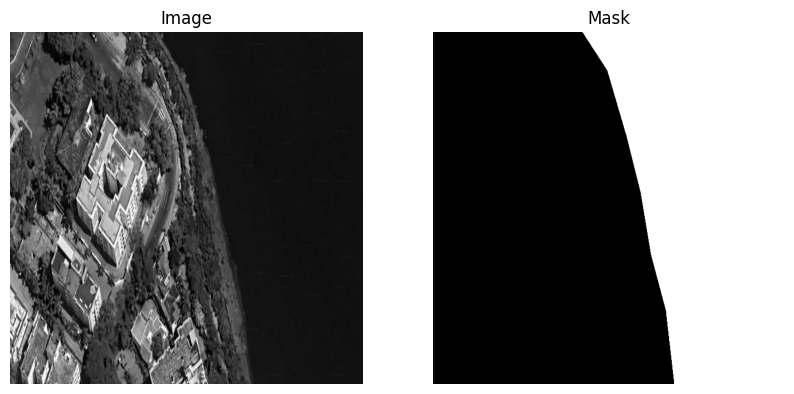

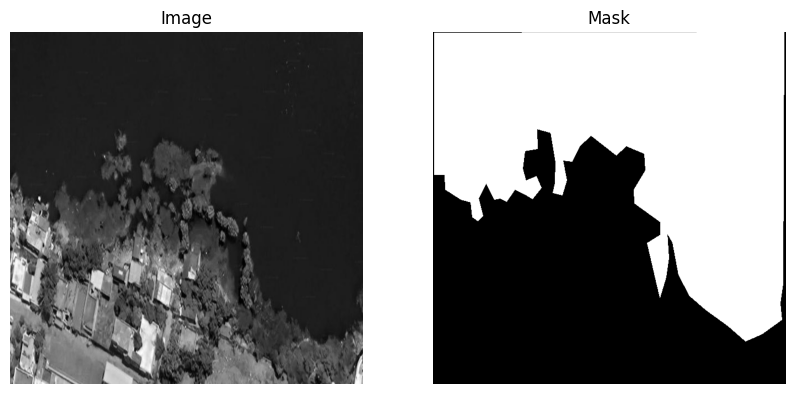

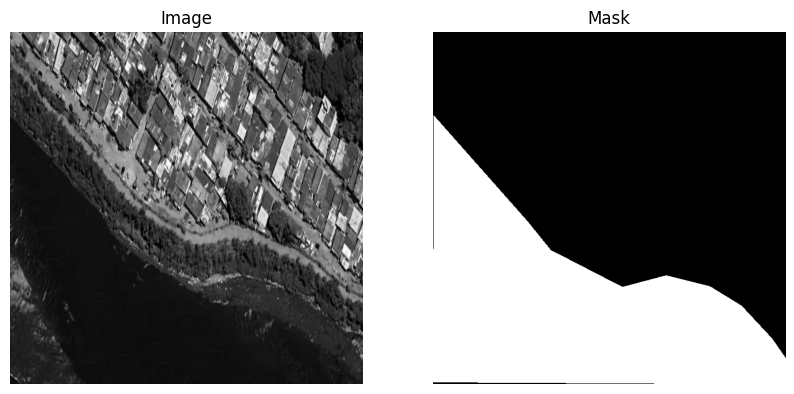

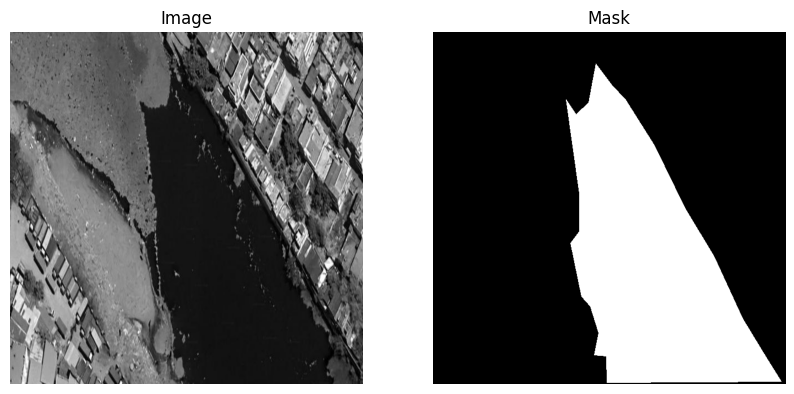

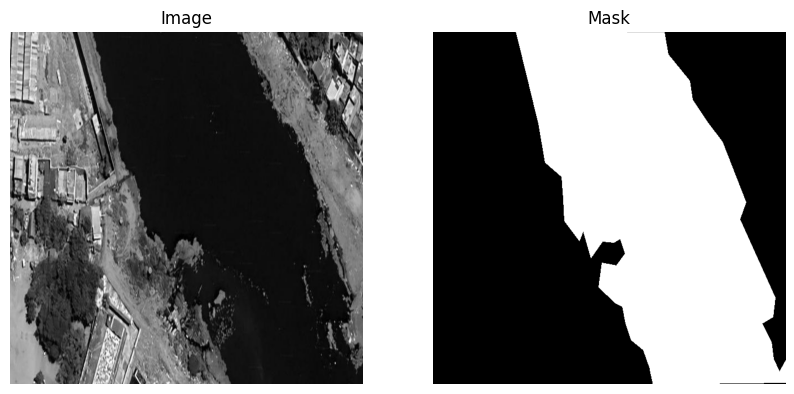

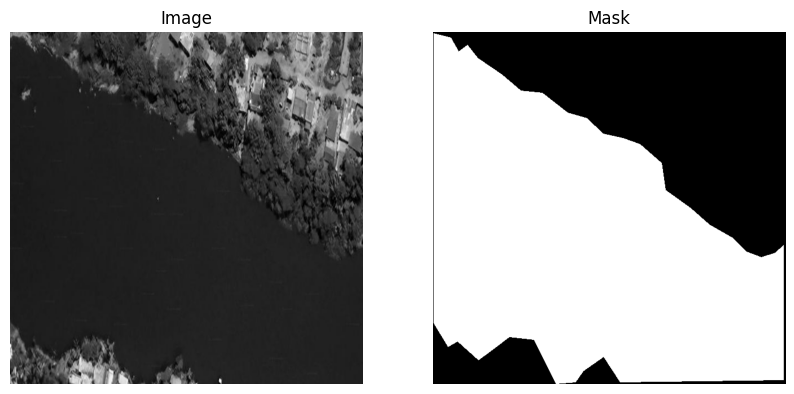

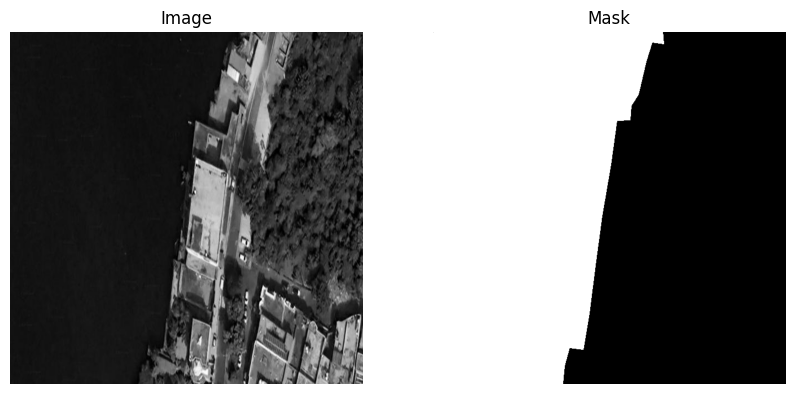

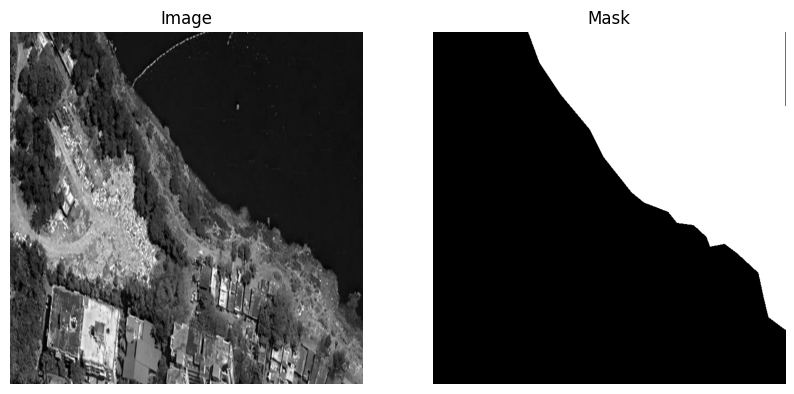

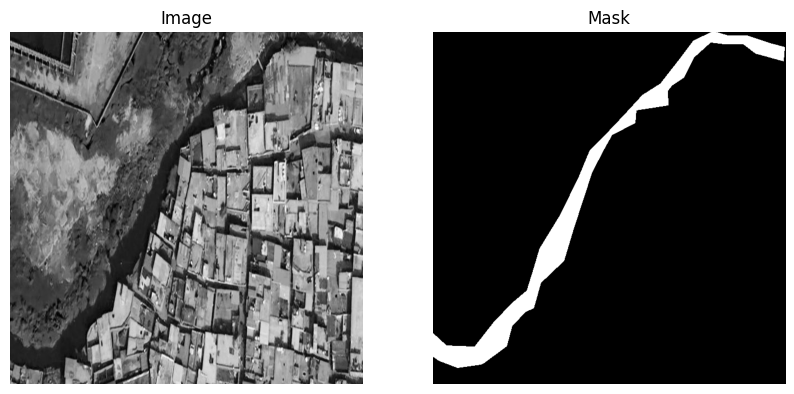

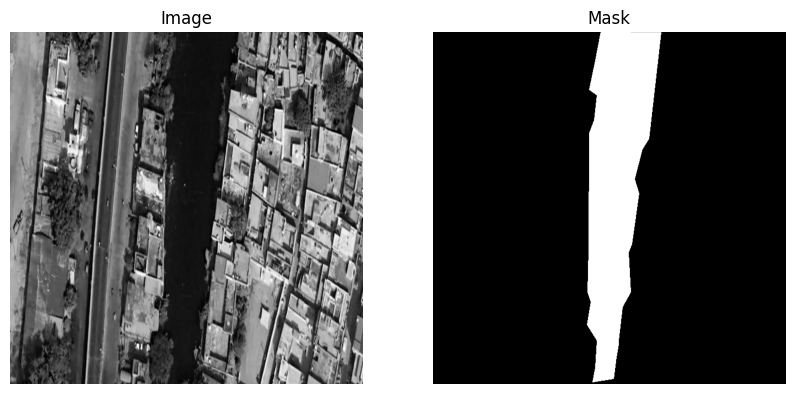

In [7]:
def display_image_and_mask(image, mask):
    """
    Display a single image and its corresponding mask side by side.

    :param image: The image to display (numpy array).
    :param mask: The corresponding mask to display (numpy array).
    """
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Display image
    axs[0].imshow(image)
    axs[0].set_title("Image")
    axs[0].axis('off')

    # Display mask
    axs[1].imshow(mask, cmap='gray')
    axs[1].set_title("Mask")
    axs[1].axis('off')

    plt.show()

# Visualize the first few images and masks
num_images_to_visualize = 10  # Change this to visualize more images
for i in range(min(num_images_to_visualize, len(train_images))):
    display_image_and_mask(train_images[i], train_masks[i])

# **MODEL TRAINING**

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [9]:
# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# ModelCheckpoint callback to save the best model based on validation loss
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)


In [10]:
def unet_model(input_size=(640, 640, 3)):
    inputs = Input(input_size)

    # Contracting Path
    c1 = Conv2D(64, kernel_size=3, activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, kernel_size=3, activation='relu', padding='same')(c1)
    p1 = MaxPooling2D(pool_size=(2, 2))(c1)

    c2 = Conv2D(128, kernel_size=3, activation='relu', padding='same')(p1)
    c2 = Conv2D(128, kernel_size=3, activation='relu', padding='same')(c2)
    p2 = MaxPooling2D(pool_size=(2, 2))(c2)

    c3 = Conv2D(256, kernel_size=3, activation='relu', padding='same')(p2)
    c3 = Conv2D(256, kernel_size=3, activation='relu', padding='same')(c3)
    p3 = MaxPooling2D(pool_size=(2, 2))(c3)

    c4 = Conv2D(512, kernel_size=3, activation='relu', padding='same')(p3)
    c4 = Conv2D(512, kernel_size=3, activation='relu', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    # Bottleneck
    c5 = Conv2D(1024, kernel_size=3, activation='relu', padding='same')(p4)
    c5 = Conv2D(1024, kernel_size=3, activation='relu', padding='same')(c5)

    # Expanding Path
    u6 = Conv2DTranspose(512, kernel_size=2, strides=2, padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, kernel_size=3, activation='relu', padding='same')(u6)
    c6 = Conv2D(512, kernel_size=3, activation='relu', padding='same')(c6)

    u7 = Conv2DTranspose(256, kernel_size=2, strides=2, padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, kernel_size=3, activation='relu', padding='same')(u7)
    c7 = Conv2D(256, kernel_size=3, activation='relu', padding='same')(c7)

    u8 = Conv2DTranspose(128, kernel_size=2, strides=2, padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, kernel_size=3, activation='relu', padding='same')(u8)
    c8 = Conv2D(128, kernel_size=3, activation='relu', padding='same')(c8)

    u9 = Conv2DTranspose(64, kernel_size=2, strides=2, padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(64, kernel_size=3, activation='relu', padding='same')(u9)
    c9 = Conv2D(64, kernel_size=3, activation='relu', padding='same')(c9)

    outputs = Conv2D(1, kernel_size=1, activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 640, 640, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 640, 640, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 640, 640, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
# Fit the model with both callbacks
model.fit(train_images, train_masks, validation_data=(test_images, test_masks), epochs=25, batch_size=4, callbacks=[early_stopping, checkpoint])

Epoch 1/25
 1/27 [>.............................] - ETA: 1:23:41 - loss: 0.6925 - accuracy: 0.5659

# **MODEL SAVE**

---



In [ ]:
model.save('/content/drive/MyDrive/waterbody2.10_model.h5')

# **LOAD MODEL**

In [4]:
building_model=load_model('/content/drive/MyDrive/building_dataset/my_unet_model.h5')

In [5]:
# Load the saved model
model = load_model('/content/drive/MyDrive/Water bodies detection.v1i.coco/my_unet_model.h5')

# **TEST IMAGES**

> Add blockquote



In [ ]:
pip install pillow


In [6]:
from PIL import Image

def convert_to_grayscale(image_path, save_path=None):

    try:
        # Open the image
        img = Image.open(image_path)
        # Convert the image to grayscale
        grayscale_img = img.convert("L")
        # Save the image if a save path is provided
        if save_path:
            grayscale_img.save(save_path)
        return grayscale_img
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [7]:
# Step 2: Load and preprocess the input image
def preprocess_image(image_path, target_size=(640, 640)):
    # Load the image
    img = load_img(image_path, target_size=target_size, color_mode="rgb")
    # Convert the image to a numpy array and normalize it (if needed)
    img_array = img_to_array(img) / 255.0
    # Add batch dimension (since the model expects input shape [batch_size, height, width, channels])
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [8]:
# Visualizing the original image and predicted mask
def visualize_prediction(image_path, predicted_mask):
    # Load the original image for comparison
    original_image = load_img(image_path, target_size=(640, 640), color_mode="rgb")
    original_image = img_to_array(original_image) / 255.0

    # Remove batch dimension from predicted_mask
    predicted_mask = predicted_mask[0, :, :, 0]

    # Plotting the original image and predicted mask side by side
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_image[:, :, 0], cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Predicted Mask")
    plt.imshow(predicted_mask, cmap='gray')
    plt.axis('off')

    plt.show()

In [9]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 62.1 MB/s eta 0:00:00


In [ ]:

import rasterio

def post_process_wmask(predicted_mask, area_threshold=1000, input_tif_path=None, output_tif_path=None):
    """
    Post-process the predicted waterbody mask to remove small regions,
    fill small holes, and smooth edges while preserving geospatial info.

    Args:
        predicted_mask (numpy.ndarray): Binary waterbody mask (2D array with 0 and 1 values).
        area_threshold (int): Minimum area for connected components to be retained.
        input_tif_path (str): Path to the input TIFF to read geospatial metadata.
        output_tif_path (str): Path to save the processed output TIFF with geospatial metadata.

    Returns:
        numpy.ndarray: Refined binary waterbody mask.
    """
    # Ensure the input is 2D
    if len(predicted_mask.shape) > 2:
        predicted_mask = predicted_mask.squeeze()

    # Convert to uint8 if necessary
    predicted_mask = (predicted_mask * 255).astype(np.uint8)

    # Find connected components
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(predicted_mask, connectivity=8)

    # Create an empty mask to store the filtered components
    filtered_mask = np.zeros_like(predicted_mask)

    # Iterate through each component (skip the background, label 0)
    for label in range(1, num_labels):
        area = stats[label, cv2.CC_STAT_AREA]
        if area >= area_threshold:  # Retain only components larger than the threshold
            filtered_mask[labels == label] = 255

    # Apply morphological closing to smooth edges and fill small gaps
    kernel = np.ones((5, 5), np.uint8)
    final_mask = cv2.morphologyEx(filtered_mask, cv2.MORPH_CLOSE, kernel)

    # If input and output paths are provided, save the processed mask with geospatial info
    if input_tif_path and output_tif_path:
        with rasterio.open(input_tif_path) as src:
            profile = src.profile  # Read the geospatial metadata from the input TIFF

        # Save the processed mask as a new TIFF with the same geospatial metadata
        with rasterio.open(output_tif_path, 'w', **profile) as dst:
            dst.write(final_mask, 1)  # Write the processed mask to the first band

    return final_mask

In [31]:
import cv2
import numpy as np

def post_process_wmask(predicted_mask):
    """
    Post-processes the predicted waterbody mask to extract the exact boundary
    of the connected waterbody regions.

    Args:
        predicted_mask (numpy.ndarray): Binary mask predicted by the model (2D array).

    Returns:
        numpy.ndarray: A binary mask containing the exact boundaries of the waterbody regions.
    """
    predicted_mask = (predicted_mask > 0).astype(np.uint8) * 255
    predicted_mask = predicted_mask.squeeze()  # Remove batch dimension if present

    # Step 1: Find connected components
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(predicted_mask, connectivity=8)

    # Step 2: Create an empty mask for the boundaries
    boundary_mask = np.zeros_like(predicted_mask, dtype=np.uint8)

    # Step 3: Extract contours for each connected component (excluding the background)
    for label in range(1, num_labels):  # Skip label 0 (background)
        component_mask = (labels == label).astype(np.uint8)

        # Find contours for the current connected component
        contours, _ = cv2.findContours(component_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Draw the contour on the boundary mask
        cv2.drawContours(boundary_mask, contours, -1, color=1, thickness=1)  # Use thickness=1 for boundary line

    return boundary_mask


In [11]:
def post_process_bmask(predicted_mask, input_tif_path=None, output_tif_path=None):
    """
    Post-process the predicted building mask to remove small regions,
    fill small holes, and smooth edges while preserving geospatial info.

    Args:
        predicted_mask (numpy.ndarray): Binary building mask (2D array with 0 and 1 values).
        input_tif_path (str): Path to the input TIFF to read geospatial metadata.
        output_tif_path (str): Path to save the processed output TIFF with geospatial metadata.

    Returns:
        numpy.ndarray: Refined binary building mask.
    """
    if len(predicted_mask.shape) > 2:
        predicted_mask = predicted_mask.squeeze()

    # Convert to uint8 if necessary
    predicted_mask = (predicted_mask * 255).astype(np.uint8)
    kernel = np.ones((5, 5), np.uint8)

    # Perform closing (dilation followed by erosion) to fill small holes
    closed_mask = cv2.morphologyEx(predicted_mask, cv2.MORPH_CLOSE, kernel)

    # Apply Gaussian blur for smoothing
    blurred_mask = cv2.GaussianBlur(closed_mask, (5, 5), 0)

    # Reapply thresholding after blur
    final_mask = (blurred_mask > 0.7).astype(np.uint8)

    # If input and output paths are provided, save the processed mask with geospatial info
    if input_tif_path and output_tif_path:
        with rasterio.open(input_tif_path) as src:
            profile = src.profile  # Read the geospatial metadata from the input TIFF

        # Save the processed mask as a new TIFF with the same geospatial metadata
        with rasterio.open(output_tif_path, 'w', **profile) as dst:
            dst.write(final_mask, 1)  # Write the processed mask to the first band

    return final_mask

In [12]:
# Function to display the original predicted mask and post-processed mask
import matplotlib.pyplot as plt
import numpy as np

def visualize_post_processing(original_mask, processed_mask):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Display original mask
    # Squeeze the original_mask to remove extra dimensions
    original_mask = np.squeeze(original_mask)

    axes[0].set_title("Original Predicted Mask")
    axes[0].imshow(original_mask, cmap='gray')
    axes[0].axis('off')

    # Display processed mask
    # Squeeze the processed_mask to remove extra dimensions
    processed_mask = np.squeeze(processed_mask)

    axes[1].set_title("Post-Processed Mask")
    axes[1].imshow(processed_mask, cmap='gray')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

In [38]:
image_path= '/content/SN5_roads_train_AOI_8_Mumbai_PS-RGB_chip820.tif'

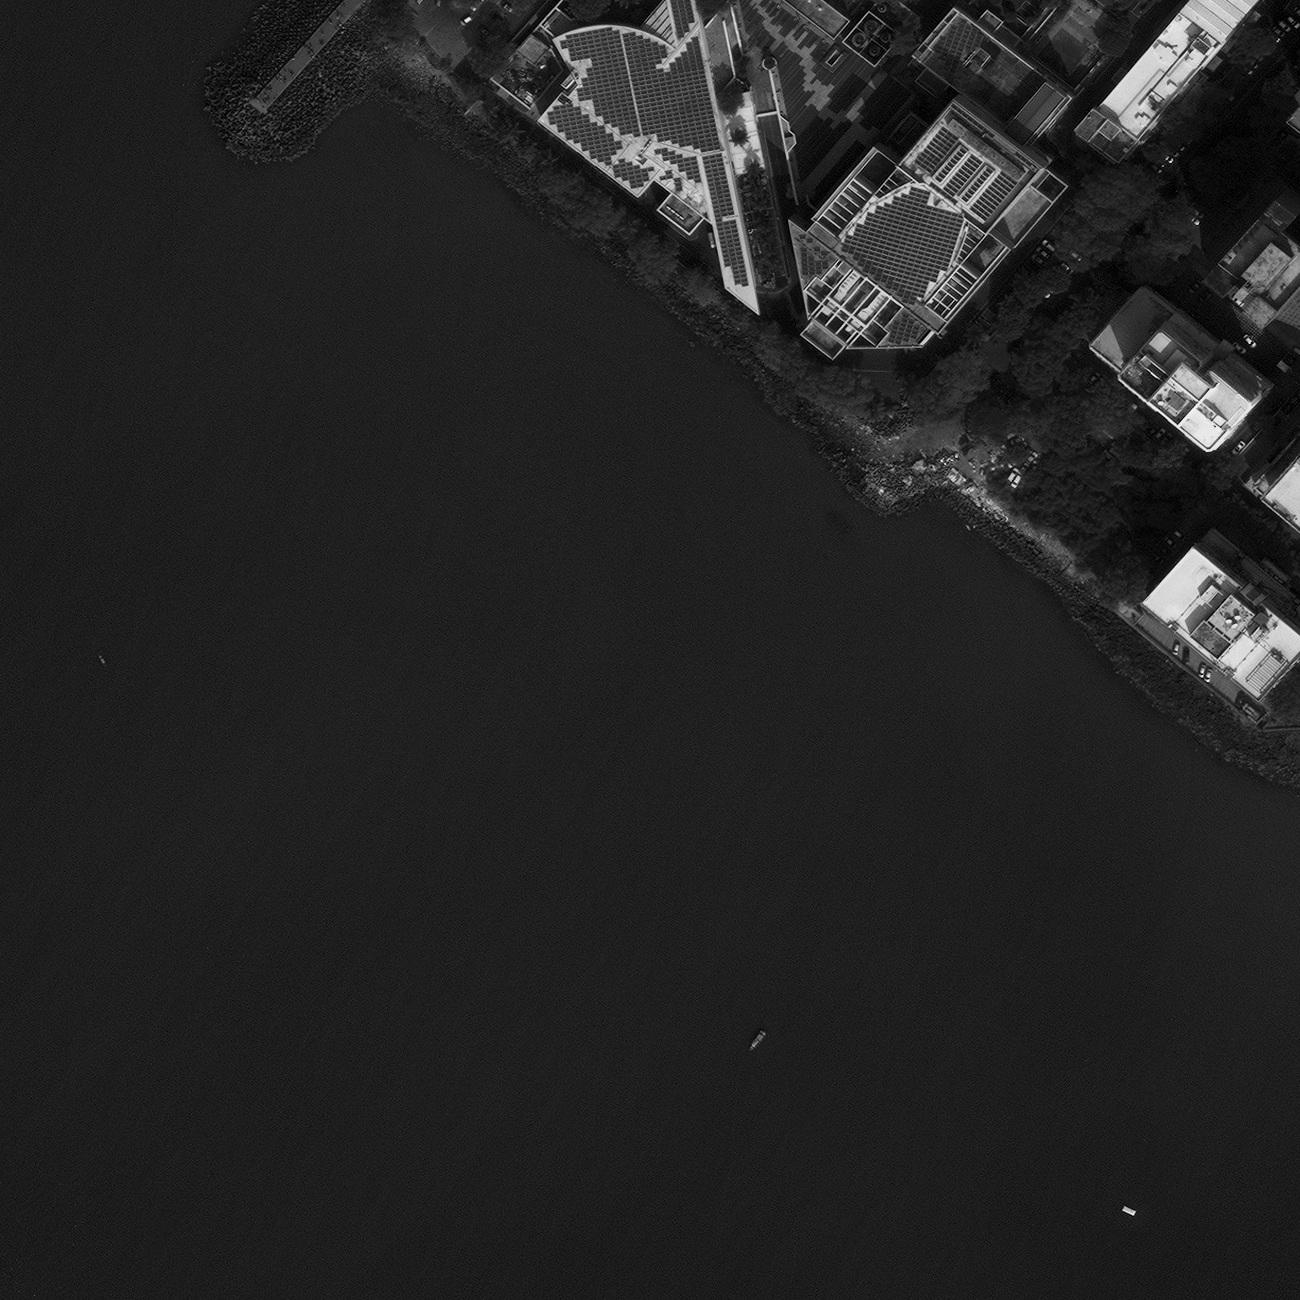

In [39]:
convert_to_grayscale(image_path, save_path='/content/test image (1).tiff')

In [40]:
image = cv2.imread(image_path)

  # Binary mask thresholding

In [41]:
input_image = preprocess_image(image_path)

waterbody_mask = model.predict(input_image)

waterbody_mask = (waterbody_mask > 0.5).astype(np.uint8)

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


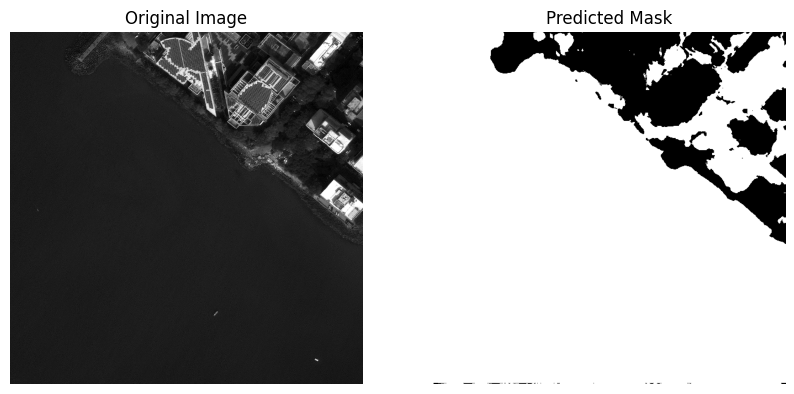

In [42]:
visualize_prediction(image_path,waterbody_mask)

In [43]:
post_waterbody_mask = post_process_wmask(waterbody_mask)



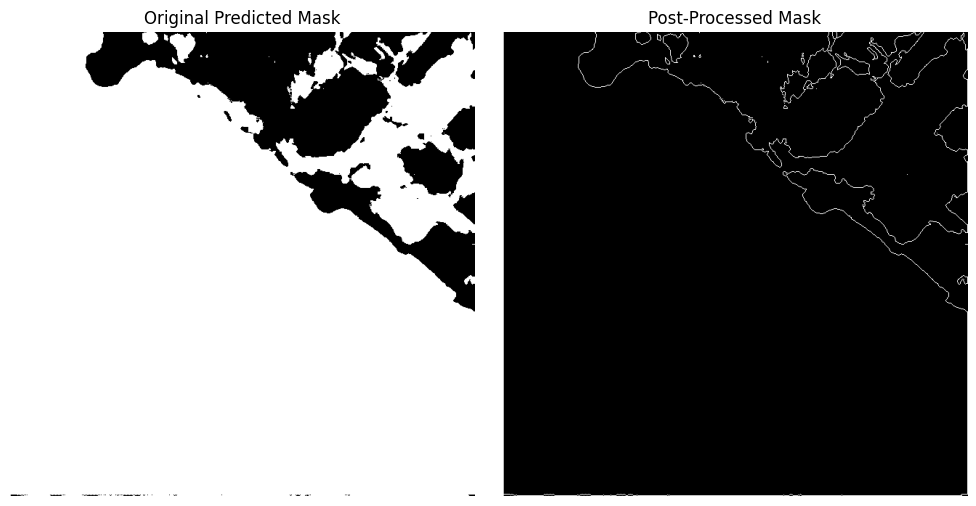

In [44]:
visualize_post_processing(waterbody_mask,post_waterbody_mask)

In [45]:
building_mask = building_model.predict(input_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


In [46]:
building_mask = (building_mask > 0.6).astype(np.uint8)

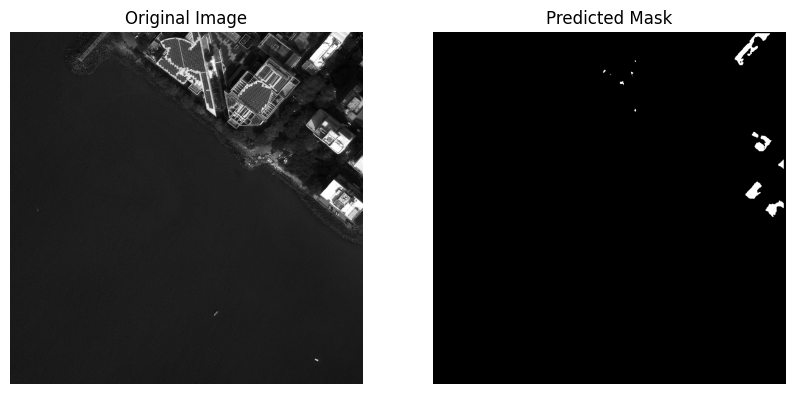

In [47]:
visualize_prediction(image_path,building_mask)

In [48]:
post_building_mask=post_process_bmask(building_mask)

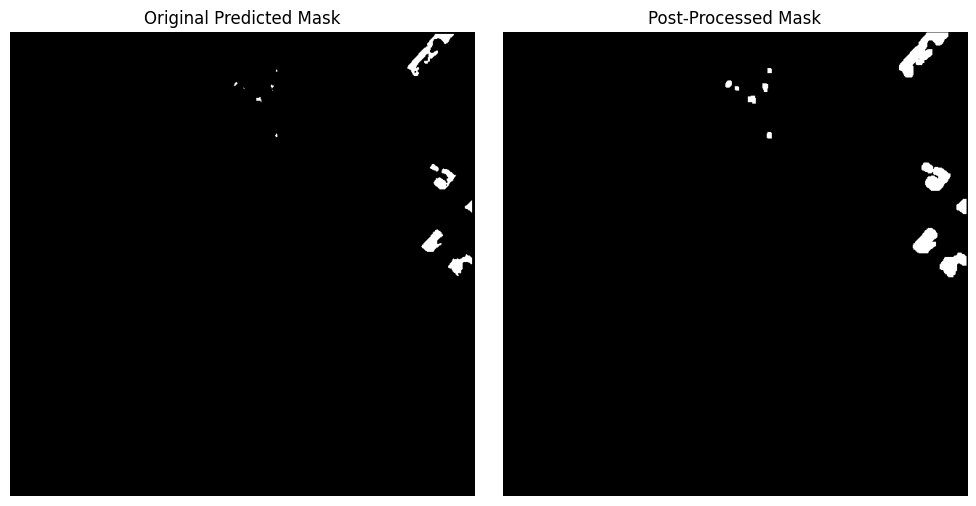

In [49]:
visualize_post_processing(building_mask,post_building_mask)

In [ ]:
def combine_masks(waterbody_mask, building_mask):
    """
    Combines the post-processed waterbody mask and building mask into a single mask.

    Args:
        waterbody_mask (numpy.ndarray): Binary mask for waterbodies (2D array with 0 and 255 values).
        building_mask (numpy.ndarray): Binary mask for buildings (2D array with 0 and 255 values).

    Returns:
        numpy.ndarray: Combined binary mask where waterbodies and buildings are included.
    """
    # Ensure masks are binary and have the same shape
    assert waterbody_mask.shape == building_mask.shape, "Masks must have the same shape"
    waterbody_mask = (waterbody_mask > 0).astype(np.uint8)
    building_mask = (building_mask > 0).astype(np.uint8)
    # Combine masks using bitwise OR
    combined_mask = cv2.bitwise_or(waterbody_mask, building_mask)

    return combined_mask


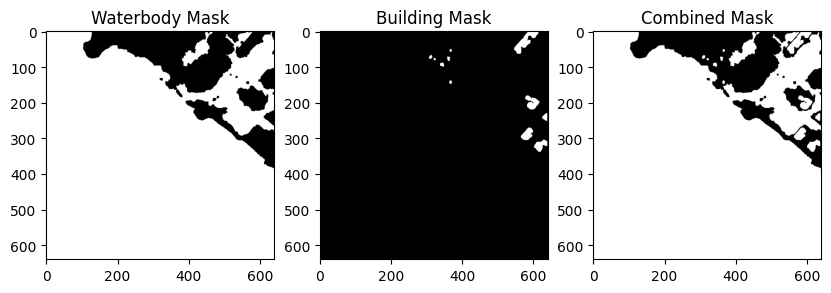

In [ ]:
combined_mask = combine_masks(post_waterbody_mask, post_building_mask)

# Save and visualize the combined mask
cv2.imwrite('combined_mask.tif', combined_mask)

# Visualize the result
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Waterbody Mask")
plt.imshow(post_waterbody_mask, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Building Mask")
plt.imshow(post_building_mask, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Combined Mask")
plt.imshow(combined_mask, cmap='gray')

plt.show()

In [29]:
print(np.sum(post_waterbody_mask))  # Should be greater than 0 if the mask has waterbody areas
print(np.sum(post_building_mask))   # Should be greater than 0 if the mask has building areas


4876
4575


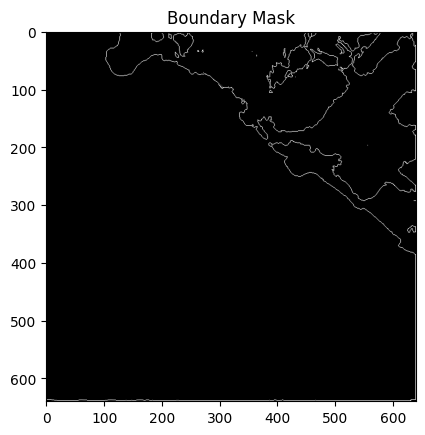

In [34]:
plt.imshow(post_waterbody_mask, cmap='gray')
plt.title("Boundary Mask")
plt.show()

# **FIND DISTANCE BETWEEN WATERBODY AND BUILDING**

In [ ]:
pip install geopy

In [52]:
import numpy as np
import rasterio
from geopy.distance import geodesic
from scipy.ndimage import label, center_of_mass

# Function to convert pixel coordinates to geographic coordinates (latitude, longitude)
def pixel_to_geo(pixel_coords, transform):
    """
    Convert pixel coordinates to geographic coordinates using affine transform.
    Args:
        pixel_coords (tuple): A tuple of pixel coordinates (row, col).
        transform (Affine): Affine transformation matrix from rasterio.
    Returns:
        tuple: Geographic coordinates (longitude, latitude).
    """
    row, col = pixel_coords
    lon, lat = transform * (col, row)
    return lon, lat

# Function to calculate centroids for individual connected components in the mask
def calculate_individual_centroids(mask):
    """
    Calculate the centroids of individual connected components in a binary mask.
    Args:
        mask (numpy.ndarray): Binary mask of buildings (2D array with 1 and 0 values).
    Returns:
        list: List of centroids for each connected component in pixel coordinates.
    """
    # Label connected components in the binary mask
    labeled_mask, num_features = label(mask)

    # Calculate the centroid for each connected component
    centroids = center_of_mass(mask, labeled_mask, range(1, num_features + 1))

    return centroids

# Function to calculate distances from building centroids to the nearest waterbody
def calculate_distances_to_boundaries(building_mask, waterbody_boundary_mask, tif_path):
    """
    Calculate the geodesic distance from each building centroid to the nearest waterbody boundary pixel.
    Args:
        building_mask (numpy.ndarray): Binary mask of buildings (2D array with 1 and 0 values).
        waterbody_boundary_mask (numpy.ndarray): Binary mask containing waterbody boundaries (1 and 0 values).
        tif_path (str): Path to the input TIFF file containing geospatial metadata.
    Returns:
        list: A list of tuples containing centroid coordinates and the nearest waterbody distance (in meters).
    """
    # Open the TIFF file to read geospatial information
    with rasterio.open(tif_path) as src:
        transform = src.transform  # Get the affine transformation
        crs = src.crs  # Coordinate Reference System

    # Calculate centroids for individual buildings
    centroids_pixel = calculate_individual_centroids(building_mask)

    # Get the coordinates of all waterbody boundary pixels
    waterbody_coords = np.column_stack(np.where(waterbody_boundary_mask == 1))  # Pixels where waterbody boundaries are
    waterbody_geo = [pixel_to_geo((row, col), transform) for row, col in waterbody_coords]

    # Debugging: Check number of detected components and waterbody boundary pixels
    print(f"Number of building components: {len(centroids_pixel)}")
    print(f"Number of waterbody boundary pixels: {len(waterbody_coords)}")

    # Convert centroids from pixel to geographic coordinates
    centroids_geo = [pixel_to_geo((centroid[0], centroid[1]), transform) for centroid in centroids_pixel]

    # Calculate distances
    results = []
    for i, centroid in enumerate(centroids_geo):
        # Calculate the geodesic distance from the centroid to the nearest waterbody boundary pixel
        distances_to_boundary = [geodesic(centroid, wb).meters for wb in waterbody_geo]
        min_distance = min(distances_to_boundary)  # Minimum distance to the nearest waterbody boundary
        results.append((centroid, min_distance))

        # Debugging: Print the results for each building centroid
        print(f"Building {i + 1} centroid (geo): {centroid} -> Nearest waterbody boundary distance: {min_distance:.2f} meters")

    return results


# Example usage
# Paths to the masks and the TIFF image
image_path = '/content/SN5_roads_train_AOI_8_Mumbai_PS-RGB_chip820.tif'

# Calculate distances
results = calculate_distances_to_boundaries(post_building_mask, post_waterbody_mask, image_path)
# Print the results



Number of building components: 11
Number of waterbody boundary pixels: 4876
Building 1 centroid (geo): (72.81892473432606, 18.925607230023623) -> Nearest waterbody boundary distance: 1.98 meters
Building 2 centroid (geo): (72.8183380347096, 18.92553787196088) -> Nearest waterbody boundary distance: 1.28 meters
Building 3 centroid (geo): (72.81817956612329, 18.92548602825903) -> Nearest waterbody boundary distance: 2.27 meters
Building 4 centroid (geo): (72.81832139548467, 18.925473333398685) -> Nearest waterbody boundary distance: 3.34 meters
Building 5 centroid (geo): (72.81821173629007, 18.925469221829452) -> Nearest waterbody boundary distance: 1.72 meters
Building 6 centroid (geo): (72.8182701493511, 18.925426266186925) -> Nearest waterbody boundary distance: 2.34 meters
Building 7 centroid (geo): (72.81833708666544, 18.925287615024924) -> Nearest waterbody boundary distance: 0.92 meters
Building 8 centroid (geo): (72.81898011296119, 18.92512592875958) -> Nearest waterbody boundary